In [1]:
from __future__ import print_function

import csv
import math
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as T
from scipy.stats import kde

from hp import HP
from rl_memory import Memory

%matplotlib inline

dev = "cuda:0"

In [2]:
def bend(p, position, angle):
    temp = list(p.conformation)
    temp[position] = angle
    p.conformation = "".join(temp)
    return p

def randomize(p,i,j):
    temp = list(p.conformation)
    for k in range(j-i):
        temp[i+k] = ["L", "S", "R"][random.randint(0,2)]
    p.conformation = "".join(temp)
    return p

def relax(p,n=10):
    q = HP(p.sequence,p.conformation)
    q.minimize(n=n)
    return q

def slide(p,n,m): # Need a slide in the other direction too, and check bounds
    temp = list(p.conformation)
    for i in range(m):
        temp[n+i] = temp[n+i+1]
    p.conformation = "".join(temp)        
    return p

def show_state(hp):
    fig,ax = plt.subplots(1,2,figsize=(10,7))    
    hp.show(ax[0],index=True)    
    hp.distogram(ax[1])
    ax[0].set_title("Energy: %f" % hp.energy())

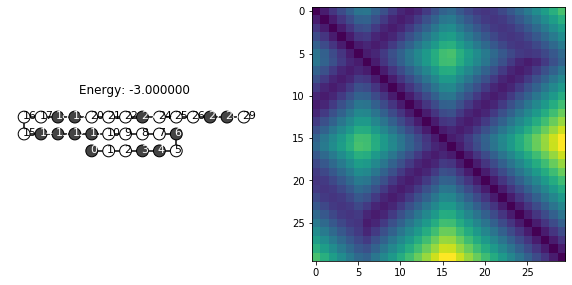

In [5]:
hp = HP.random(30)
hp = bend(hp,5,"R")
hp = bend(hp,6,"R")
hp = bend(hp,15,"L")
hp = bend(hp,16,"L")
show_state(hp)

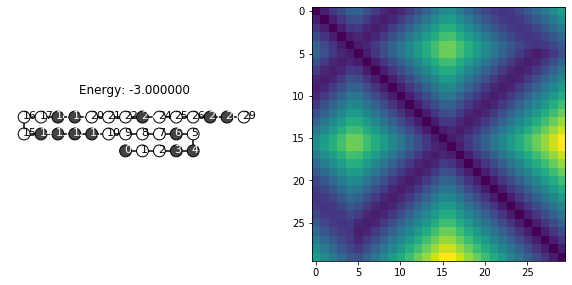

In [6]:
hp = slide(hp,2,8)
show_state(hp)

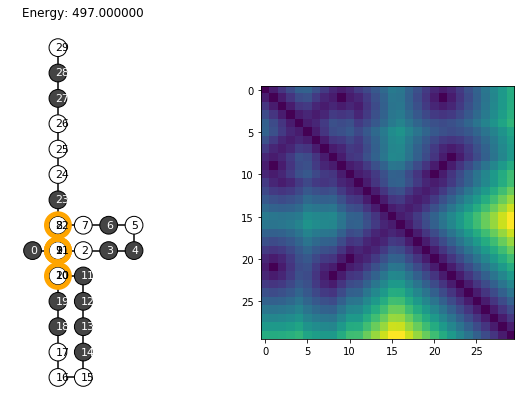

In [8]:
hp = randomize(hp,8,12)
show_state(hp)

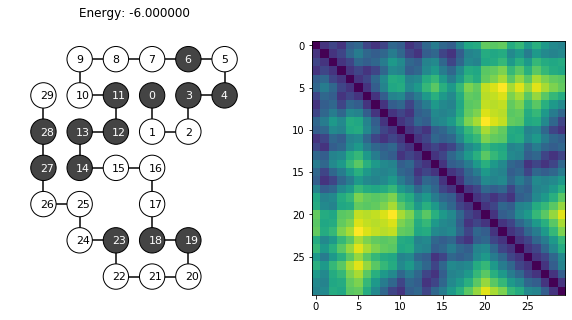

In [11]:
hp = relax(hp,n=1000)
show_state(hp)